In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
data = pd.read_csv('/Users/vishwaprabhakarsingh/Desktop/Projects/AI_ML_DataScience/ex1data1.txt', names = ['population', 'profit'])


In [4]:
data.head(10)

,population,profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233
5,8.3829,11.8860
6,7.4764,4.3483
7,8.5781,12.0000
8,6.4862,6.5987
9,5.0546,3.8166


In [5]:
## Split population and profit into X and y
X_df = pd.DataFrame(data.population)
y_df = pd.DataFrame(data.profit)

## Length, or number of observations, in our data
m = len(y_df)

Text(0,0.5,'Profit in $10,000s')

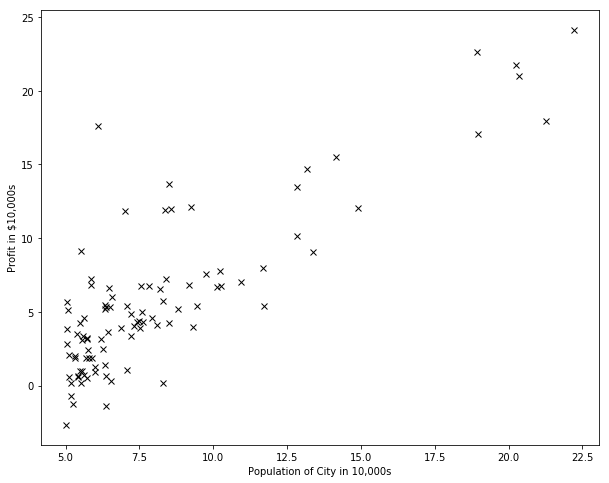

In [6]:
plt.figure(figsize=(10,8))
plt.plot(X_df, y_df, 'kx')
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000s')

Text(0,0.5,'Profit in $10,000s')

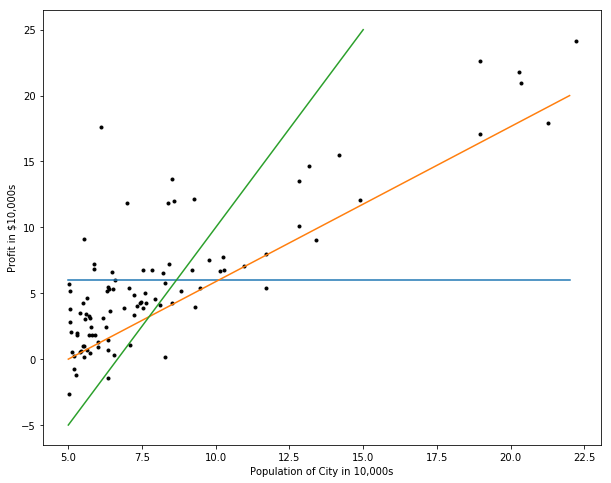

In [7]:
plt.figure(figsize=(10,8))
plt.plot(X_df, y_df, 'k.')
plt.plot([5, 22], [6,6], '-')
plt.plot([5, 22], [0,20], '-')
plt.plot([5, 15], [-5,25], '-')
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000s')

# Cost Function


It turns out that to make the best line to model the data, we want to pick parameters $\beta$ that allows our predicted value to be as close to the actual value as possible. In other words, we want the distance or residual between our hypothesis $h(x)$ and y to be minimized.
So we formally define a cost function using ordinary least squares that is simply the sum of the squared distances. To find the liner regression line, we minimize: $$J(\beta) = \frac{1}{2m}\sum_{i=1}^m(h_\beta(x^{(i)})-y^{(i)})^2$$
Again the hypothesis that we're trying to find is given by the linear model: $$h_\beta(x) = \beta^{T}x = \beta_0 + \beta_1x_1$$
The parameters of the model are the beta values. We adjust $\beta_j$ to minimze the cost function $J(\beta)$.
And we can use batch gradient descent where each iteration performs the update $$\beta_j := \beta_j - \alpha\frac{1}{m}\sum_{i=1}^m (h_\beta(x^{(i)})-y^{(i)})x_{j}^{(i)}$$
Whoa, what's gradient descent? And why are we updating that?

In [8]:
#Gradient descent simply is an algorithm that makes small steps along a function to 
#find a local minimum. We can look at a simply quadratic equation such as this one:
x_quad = [n/10 for n in range(0, 100)]
y_quad = [(n-4)**2+5 for n in x_quad]

Text(0.5,1,'Simple Quadratic Equation')

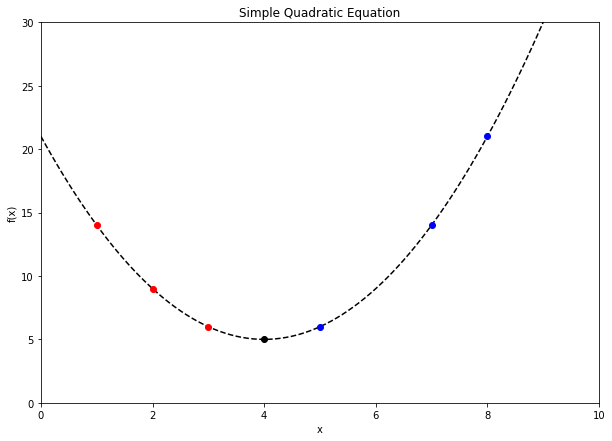

In [9]:
plt.figure(figsize = (10,7))
plt.plot(x_quad, y_quad, 'k--')
plt.axis([0,10,0,30])
plt.plot([1, 2, 3], [14, 9, 6], 'ro')
plt.plot([5, 7, 8],[6, 14, 21], 'bo')
plt.plot(4, 5, 'ko')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Simple Quadratic Equation')

First I declare some parameters. Alpha is my learning rate, and iterations defines how many times I want to perform the update.
Then I transform the data frame holding my data into an array for simpler matrix math. And then write a helper function to calculate the cost function as defined above. Using np.dot for inner matrix multiplication

In [10]:
iterations = 1500
alpha = 0.01
## Add a columns of 1s as intercept to X
X_df['intercept'] = 1

## Transform to Numpy arrays for easier matrix math and start theta at 0
X = np.array(X_df)
y = np.array(y_df).flatten()
theta = np.array([0, 0])

In [11]:
def cost_function(X, y, theta):
    """
    cost_function(X, y, theta) computes the cost of using theta as the
    parameter for linear regression to fit the data points in X and y
    """
    ## number of training examples
    m = len(y) 
    
    ## Calculate the cost with the given parameters
    J = np.sum((X.dot(theta)-y)**2)/2/m
    
    return J
cost_function(X, y, theta)


32.072733877455676

Now, I split the gradient descent algorithm into 4 parts so that I can see what's going on. Plus, I like to check my matrix dimensions to make sure that I'm doing the math in the right order.

calculate hypothesis[97x1] = x[97x2] * theta[2x1]

calculte loss [97x1] with element-wise subtraction

calculate gradient [2x1] = X' [2x97] loss [971]

update parameter theta [2x1] after element-wise subtraction multiplied by a scalar

find the cost by using cost_function()

In [12]:
def gradient_descent(X, y, theta, alpha, iterations):
    """
    gradient_descent Performs gradient descent to learn theta
    theta = GRADIENTDESENT(X, y, theta, alpha, num_iters) updates theta by 
    taking num_iters gradient steps with learning rate alpha
    """
    cost_history = [0] * iterations
    
    for iteration in range(iterations):
        hypothesis = X.dot(theta)
        loss = hypothesis-y
        gradient = X.T.dot(loss)/m
        theta = theta - alpha*gradient
        cost = cost_function(X, y, theta)
        cost_history[iteration] = cost

    return theta, cost_history

In [14]:
(t, c) = gradient_descent(X,y,theta,alpha, iterations)
print(t)

[ 1.16636235 -3.63029144]


In [16]:
## Prediction
print(np.array([3.5, 1]).dot(t))
print(np.array([7, 1]).dot(t))

0.45197678677
4.53424501294


In [17]:
## Plotting the best fit line
best_fit_x = np.linspace(0, 25, 20)
best_fit_y = [t[1] + t[0]*xx for xx in best_fit_x]

Text(0.5,1,'Profit vs. Population with Linear Regression Line')

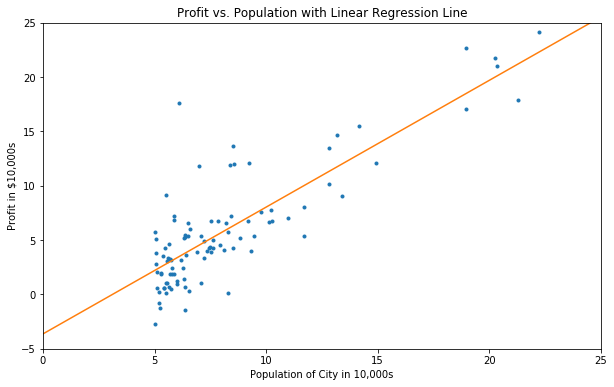

In [18]:
plt.figure(figsize=(10,6))
plt.plot(X_df.population, y_df, '.')
plt.plot(best_fit_x, best_fit_y, '-')
plt.axis([0,25,-5,25])
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000s')
plt.title('Profit vs. Population with Linear Regression Line')